# Wikipedia Webscraping

In [40]:
%pip install requests beautifulsoup4 pydantic lxml

  Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl.metadata (3.9 kB)
Using cached lxml-5.3.0-cp312-cp312-win_amd64.whl (3.8 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
url1 = "https://en.wikipedia.org/wiki/World_population"
print(url1)

https://en.wikipedia.org/wiki/World_population


In [4]:
import requests
from bs4 import BeautifulSoup

### Send the request to wikipedia url

In [5]:
response = requests.get(url1)
response

<Response [200]>

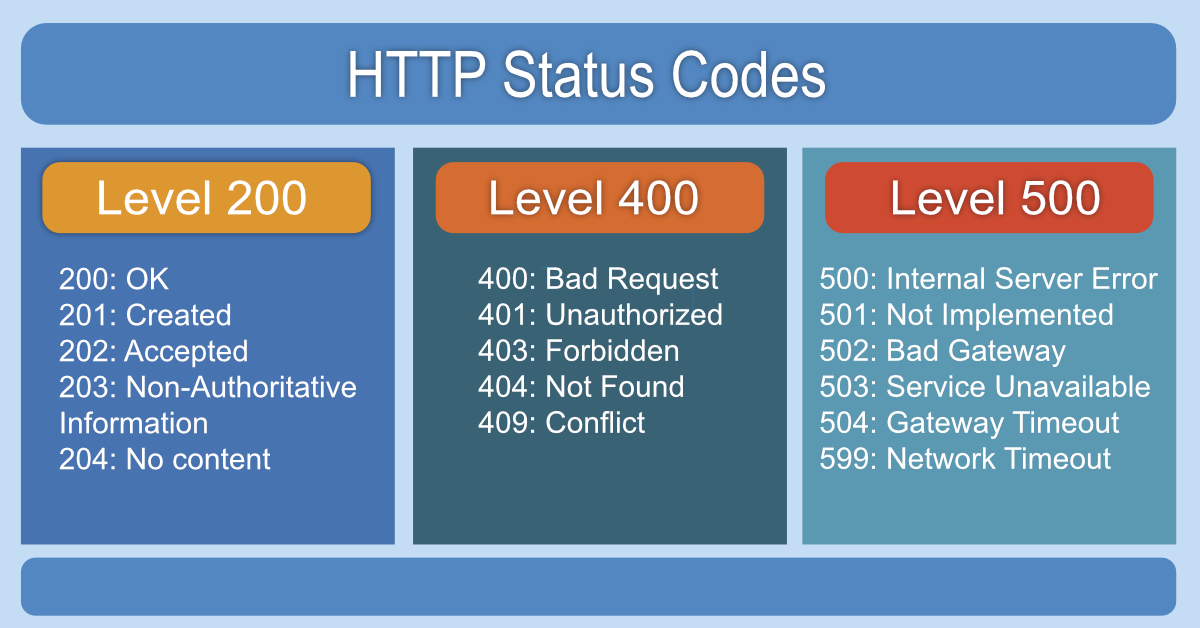

### Website is scrapable only if response code is 200

In [8]:
print(response.content[0:1000])

b'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8">\n<title>World population - Wikipedia</title>\n<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 

### Create a beautiful soup to get particular data from website

In [12]:
soup = BeautifulSoup(response.content)

In [13]:
soup.title

<title>World population - Wikipedia</title>

In [14]:
soup.title.text

'World population - Wikipedia'

### Getting h1 tag 
Find is for single element

In [15]:
h1_tag = soup.find("h1")
h1_tag

<h1 class="firstHeading mw-first-heading" id="firstHeading"><span class="mw-page-title-main">World population</span></h1>

In [16]:
h1_tag.text

'World population'

### Find all h2 tags
find_all to find all elements

In [17]:
h2_tags = soup.find_all("h2")
h2_tags

[<h2 class="vector-pinnable-header-label">Contents</h2>,
 <h2 id="History">History</h2>,
 <h2 id="Global_demographics">Global demographics</h2>,
 <h2 id="Population_by_region">Population by region</h2>,
 <h2 id="Largest_populations_by_country">Largest populations by country</h2>,
 <h2 id="Fluctuation">Fluctuation</h2>,
 <h2 id="Mathematical_approximations">Mathematical approximations</h2>,
 <h2 id="Number_of_humans_who_have_ever_lived">Number of humans who have ever lived</h2>,
 <h2 id="Human_population_as_a_function_of_food_availability">Human population as a function of food availability</h2>,
 <h2 id="See_also">See also</h2>,
 <h2 id="Explanatory_notes">Explanatory notes</h2>,
 <h2 id="References">References</h2>,
 <h2 id="Further_reading">Further reading</h2>,
 <h2 id="External_links">External links</h2>]

In [18]:
h2_text = [ele.text for ele in h2_tags]
h2_text

['Contents',
 'History',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Fluctuation',
 'Mathematical approximations',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Further reading',
 'External links']

### Getting all paragraphs

In [21]:
p_tags = soup.find_all("p")
p_tags[0:2]

[<p class="mw-empty-elt">
 </p>,
 <p>In <a href="/wiki/Demographics_of_the_world" title="Demographics of the world">world demographics</a>, the <b>world population</b> is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human <a href="/wiki/Prehistory" title="Prehistory">prehistory</a> and <a href="/wiki/Human_history" title="Human history">history</a> for the human population to reach a billion and only 218 years more to reach 8 billion.
 </p>]

In [22]:
p_text = [ele.text for ele in p_tags]
p_text[0:3]

['\n',
 'In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 years more to reach 8\xa0billion.\n',
 'The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and Social Affair

In [24]:
paras = "\n\n".join(p_text)

In [27]:
print(paras[0:1000])




In world demographics, the world population is the total number of humans currently alive. It was estimated by the United Nations to have exceeded eight billion in mid-November 2022. It took around 300,000 years of human prehistory and history for the human population to reach a billion and only 218 years more to reach 8 billion.


The human population has experienced continuous growth following the Great Famine of 1315–1317 and the end of the Black Death in 1350, when it was nearly 370,000,000.[2] The highest global population growth rates, with increases of over 1.8% per year, occurred between 1955 and 1975, peaking at 2.1% between 1965 and 1970.[3] The growth rate declined to 1.1% between 2015 and 2020 and is projected to decline further in the 21st century.[4] The global population is still increasing, but there is significant uncertainty about its long-term trajectory due to changing fertility and mortality rates.[5] The UN Department of Economics and Social Affairs projects be

### Image links

In [28]:
img_tags = soup.find_all("a", class_="mw-file-description")
img_tags

[<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="225" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/300px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/450px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/600px-World_Population_Prospects.svg.png 2x" width="300"/></a>,
 <a class="mw-file-description" href="/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png"><img class="mw-file-element" data-file-height="7747" data-file-width="5201" decoding="async" height="328" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png/220px-Illustration_of_contempor

In [29]:
img_tags[0]

<a class="mw-file-description" href="/wiki/File:World_Population_Prospects.svg"><img class="mw-file-element" data-file-height="676" data-file-width="900" decoding="async" height="225" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/300px-World_Population_Prospects.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/450px-World_Population_Prospects.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0e/World_Population_Prospects.svg/600px-World_Population_Prospects.svg.png 2x" width="300"/></a>

In [34]:
home = "https://en.wikipedia.org"

In [35]:
home + img_tags[0].get("href")

'https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg'

In [36]:
img_links = [home + ele.get("href") for ele in img_tags]
img_links

['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org/wiki/File:2006megacities.svg',
 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org/wiki/File:World_population_counter,_Eureka,_Halifax,_West_Y

### Get all the tables

In [38]:
table_tags = soup.find_all("table", class_="wikitable")
table_tags[0]

<table class="wikitable" style="text-align:center; float:right; clear:right; margin-left:8px; margin-right:0;">
<caption>World population milestones in billions<sup class="reference" id="cite_ref-:6_59-0"><a href="#cite_note-:6-59"><span class="cite-bracket">[</span>59<span class="cite-bracket">]</span></a></sup> (Worldometers estimates)
</caption>
<tbody><tr>
<th scope="row">Population
</th>
<th scope="col">1
</th>
<th scope="col">2
</th>
<th scope="col">3
</th>
<th scope="col">4
</th>
<th scope="col">5
</th>
<th scope="col">6
</th>
<th scope="col">7
</th>
<th scope="col">8
</th>
<th scope="col">9
</th>
<th scope="col">10
</th></tr>
<tr>
<th scope="row">Year
</th>
<td>1804</td>
<td>1927</td>
<td>1960</td>
<td>1974</td>
<td>1987</td>
<td>1999</td>
<td>2011</td>
<td>2022</td>
<td><i>2037</i></td>
<td><i>2057</i>
</td></tr>
<tr>
<th scope="row">Years elapsed
</th>
<td>200,000+</td>
<td>123</td>
<td>33</td>
<td>14</td>
<td>13</td>
<td>12</td>
<td>12</td>
<td>11</td>
<td><i>15</i></td>
<td

In [41]:
import pandas as pd
df = pd.read_html(str(table_tags[0]))

In [47]:
df[0]

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


# Class WikiScraper

In [45]:
from pydantic import BaseModel, HttpUrl

In [48]:
class WikiScraper(BaseModel):

    url: HttpUrl

    def get_page(self):
        response = requests.get(self.url)
        response.raise_for_status()
        return response.content
    
    def get_soup(self):
        content = self.get_page()
        soup = BeautifulSoup(content)
        return soup 
    
    def get_title(self):
        soup = self.get_soup()
        return soup.title.text 
    
    def get_heading(self):
        soup = self.get_soup()
        h1_tag = soup.find("h1")
        return h1_tag.text
    
    def get_subheadings(self):
        soup = self.get_soup()
        h2_tags = soup.find_all("h2")
        h2_text = [ele.text for ele in h2_tags]
        return h2_text
    
    def get_paras(self):
        soup = self.get_soup()
        p_tags = soup.find_all("p")
        p_text = [ele.text for ele in p_tags]
        p_str = "\n".join(p_text)
        return p_str 
    
    def get_img_links(self):
        soup = self.get_soup()
        home = "https://en.wikipedia.org"
        img_tags = soup.find_all("a", class_="mw-file-description")
        img_links = [home + ele.get("href") for ele in img_tags]
        return img_links
    
    def get_tables(self):
        soup = self.get_soup()
        dfs = []
        table_tags = soup.find_all("table", class_="wikitable")
        for i in table_tags:
            data = pd.read_html(str(i))[0]
            dfs.append(data)
        return dfs


In [49]:
scraper1 = WikiScraper(url="abcde")

ValidationError: 1 validation error for WikiScraper
url
  Input should be a valid URL, relative URL without a base [type=url_parsing, input_value='abcde', input_type=str]
    For further information visit https://errors.pydantic.dev/2.9/v/url_parsing

In [50]:
scraper1 = WikiScraper(url="https://en.wikipedia.org/wiki/World_population")
scraper1

WikiScraper(url=Url('https://en.wikipedia.org/wiki/World_population'))

In [51]:
scraper1.get_title()

'World population - Wikipedia'

In [52]:
scraper1.get_heading()

'World population'

In [53]:
scraper1.get_subheadings()

['Contents',
 'History',
 'Global demographics',
 'Population by region',
 'Largest populations by country',
 'Fluctuation',
 'Mathematical approximations',
 'Number of humans who have ever lived',
 'Human population as a function of food availability',
 'See also',
 'Explanatory notes',
 'References',
 'Further reading',
 'External links']

In [54]:
imgs = scraper1.get_img_links()

In [55]:
imgs

['https://en.wikipedia.org/wiki/File:World_Population_Prospects.svg',
 'https://en.wikipedia.org/wiki/File:Illustration_of_contemporary_and_past_human_populations_Our_World_in_Data.png',
 'https://en.wikipedia.org/wiki/File:2006megacities.svg',
 'https://en.wikipedia.org/wiki/File:Expectancy_of_life.svg',
 'https://en.wikipedia.org/wiki/File:Population_pyramid_of_the_world_in_continental_groupings_2023.svg',
 'https://en.wikipedia.org/wiki/File:Global_population_cartogram.png',
 'https://en.wikipedia.org/wiki/File:People%27s_-Km%C2%B2_for_all_countries_(and_us_states,_uk_kingdoms).png',
 'https://en.wikipedia.org/wiki/File:Top_5_Country_Population_Graph_1901_to_2021.svg',
 'https://en.wikipedia.org/wiki/File:Population_Density,_v4.11,_2020_(48009093621).jpg',
 'https://en.wikipedia.org/wiki/File:World_population_(UN).svg',
 'https://en.wikipedia.org/wiki/File:Total_Fertility_Rate_Map_by_Country.svg',
 'https://en.wikipedia.org/wiki/File:World_population_counter,_Eureka,_Halifax,_West_Y

In [56]:
dfs = scraper1.get_tables()

In [57]:
for i in dfs:
    display(i)

,Population,1,2,3,4,5,6,7,8,9,10
0,Year,1804,1927,1960,1974,1987,1999,2011,2022,2037,2057
1,Years elapsed,"200,000+",123,33,14,13,12,12,11,15,20


,Region,2022 (percent),2030 (percent),2050 (percent)
0,Sub-Saharan Africa,"1,152 (14.51%)","1,401 (16.46%)","2,094 (21.62%)"
1,Northern Africa and Western Asia,549 (6.91%),617 (7.25%),771 (7.96%)
2,Central Asia and Southern Asia,"2,075 (26.13%)","2,248 (26.41%)","2,575 (26.58%)"
3,Eastern Asia and Southeastern Asia,"2,342 (29.49%)","2,372 (27.87%)","2,317 (23.92%)"
4,Europe and Northern America,"1,120 (14.10%)","1,129 (13.26%)","1,125 (11.61%)"
5,Latin America and the Caribbean,658 (8.29%),695 (8.17%),749 (7.73%)
6,Australia and New Zealand,31 (0.39%),34 (0.40%),38 (0.39%)
7,Oceania,14 (0.18%),15 (0.18%),20 (0.21%)
8,World,7942,8512,9687


,Region,Density (inhabitants/km2),Population (millions),Most populous country,Most populous city (metropolitan area)
0,Asia,104.1,4641,"1,439,090,595 – India","13,515,000 – Tokyo Metropolis (37,400,000 – Gr..."
1,Africa,44.4,1340,"0,211,401,000 – Nigeria","09,500,000 – Cairo (20,076,000 – Greater Cairo)"
2,Europe,73.4,747,"0,146,171,000 – Russia, approx. 110 million in...","13,200,000 – Moscow (20,004,000 – Moscow metro..."
3,Latin America,24.1,653,"0,214,103,000 – Brazil","12,252,000 – São Paulo City (21,650,000 – São ..."
4,Northern America[note 1],14.9,368,"0,332,909,000 – United States","08,804,000 – New York City (23,582,649 – New Y..."
5,Oceania,5,42,"0,025,917,000 – Australia","05,367,000 – Sydney"
6,Antarctica,~0,0.004[87],N/A[note 2],"00,001,258 – McMurdo Station"


,Country / Dependency,Population,% of world,Date,Source (official or from the United Nations)
0,India,1425775850,17.5%,14 Apr 2023,UN projection[90]
1,China,1409670000,17.3%,17 Jan 2024,National annual estimate[91]
2,United States,336997411,4.14%,4 Oct 2024,National population clock[92]
3,Indonesia,278696200,3.43%,1 Jul 2023,National annual estimate[93]
4,Pakistan,229488994,2.82%,1 Jul 2022,UN projection[94]
5,Nigeria,216746934,2.66%,1 Jul 2022,UN projection[94]
6,Brazil,218247188,2.68%,4 Oct 2024,National population clock[95]
7,Bangladesh,168220000,2.07%,1 Jul 2020,Annual Population Estimate[96]
8,Russia,147190000,1.81%,1 Oct 2021,2021 preliminary census results[97]
9,Mexico,128271248,1.58%,31 Mar 2022,NaN


,#,Most populous countries,2000,2015,2030[A],Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_2,Unnamed: 2_level_2,Unnamed: 3_level_2,Unnamed: 4_level_2,Unnamed: 5_level_2
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_3,Unnamed: 2_level_3,Unnamed: 3_level_3,Unnamed: 4_level_3,Unnamed: 5_level_3
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_4,Unnamed: 2_level_4,Unnamed: 3_level_4,Unnamed: 4_level_4,Unnamed: 5_level_4
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_5,Unnamed: 2_level_5,Unnamed: 3_level_5,Unnamed: 4_level_5,Unnamed: 5_level_5
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_6,Unnamed: 2_level_6,Unnamed: 3_level_6,Unnamed: 4_level_6,Unnamed: 5_level_6
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_7,Unnamed: 2_level_7,Unnamed: 3_level_7,Unnamed: 4_level_7,Unnamed: 5_level_7
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_8,Unnamed: 2_level_8,Unnamed: 3_level_8,Unnamed: 4_level_8,Unnamed: 5_level_8
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_9,Unnamed: 2_level_9,Unnamed: 3_level_9,Unnamed: 4_level_9,Unnamed: 5_level_9
,Graphs are unavailable due to technical issues. There is more info on Phabricator and on MediaWiki.org.,Unnamed: 1_level_10,Unnamed: 2_level_10,Unnamed: 3_level_10,Unnamed: 4_level_10,Unnamed: 5_level_10


,Rank,Country,Population,Area (km2),Density (pop/km2)
0,1,Singapore,5921231,719,8235
1,2,Bangladesh,165650475,148460,1116
2,3,Palestine[note 3][101],5223000,6025,867
3,4,Taiwan[note 4],23580712,35980,655
4,5,South Korea,51844834,99720,520
5,6,Lebanon,5296814,10400,509
6,7,Rwanda,13173730,26338,500
7,8,Burundi,12696478,27830,456
8,9,Israel,9402617,21937,429
9,10,India,1389637446,3287263,423


,Rank,Country,Population,Area (km2),Density (pop/km2),Population trend[citation needed]
0,1,India,1389637446,3287263,423,Growing
1,2,Pakistan,242923845,796095,305,Rapidly growing
2,3,Bangladesh,165650475,148460,1116,Growing
3,4,Japan,124214766,377915,329,Declining[102]
4,5,Philippines,114597229,300000,382,Growing
5,6,Vietnam,103808319,331210,313,Growing
6,7,United Kingdom,67791400,243610,278,Growing
7,8,South Korea,51844834,99720,520,Steady
8,9,Taiwan,23580712,35980,655,Steady
9,10,Sri Lanka,23187516,65610,353,Growing


Year  Population Yearly growth           Density (pop/km2)
    Year  Population             %    Number Density (pop/km2)
0   1951  2543130380         1.75%  43808223                17
1   1952  2590270899         1.85%  47140519                17
2   1953  2640278797         1.93%  50007898                18
3   1954  2691979339         1.96%  51700542                18
4   1955  2746072141         2.01%  54092802                18
..   ...         ...           ...       ...               ...
68  2019  7764951032         1.06%  81161204                52
69  2020  7840952880         0.98%  76001848                53
70  2021  7909295151         0.87%  68342271                53
71  2022  7975105156         0.83%  65810005                54
72  2023  8045311447         0.88%  70206291                54

[73 rows x 5 columns]

,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,World,585,660,710,791,978,1262,1650,2521,6008,6707,6896,7052,9725,9746
1,Africa,86,114,106,106,107,111,133,221,783,973,1022,1052,2478,2308
2,Asia,282,350,411,502,635,809,947,1402,3700,4054,4164,4250,5267,5561
3,Europe,168,170,178,190,203,276,408,547,675,732,738,740,734,517
4,Latin America[Note 1],40,20,10,16,24,38,74,167,508,577,590,603,784,912
5,Northern America[Note 1],6,3,2,2,7,26,82,172,312,337,345,351,433,398
6,Oceania,3,3,3,2,2,2,6,13,30,34,37,38,57,51


,Region,1500,1600,1700,1750,1800,1850,1900,1950,1999,2008,2010,2012,2050,2150
0,Africa,14.7,17.3,14.9,13.4,10.9,8.8,8.1,8.8,13.0,14.5,14.8,15.2,25.5,23.7
1,Asia,48.2,53.0,57.9,63.5,64.9,64.1,57.4,55.6,61.6,60.4,60.4,60.3,54.2,57.1
2,Europe,28.7,25.8,25.1,20.6,20.8,21.9,24.7,21.7,11.2,10.9,10.7,10.5,7.6,5.3
3,Latin America[Note 1],6.8,3.0,1.4,2.0,2.5,3.0,4.5,6.6,8.5,8.6,8.6,8.6,8.1,9.4
4,Northern America[Note 1],1.0,0.5,0.3,0.3,0.7,2.1,5.0,6.8,5.2,5.0,5.0,5.0,4.5,4.1
5,Oceania,0.5,0.5,0.4,0.3,0.2,0.2,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.5


,Year,World,Africa,Asia,Europe,Latin America & Carib.[Note 1],North America [Note 1],Oceania,Notes
0,"70,000 BC",< 0.015,NaN,NaN,NaN,NaN,NaN,NaN,[119]
1,"10,000 BC",4,NaN,NaN,NaN,NaN,NaN,NaN,[120]
2,8000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6500 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5000 BC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4000 BC,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3000 BC,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000 BC,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1000 BC,50,7.0,33.0,9.0,NaN,NaN,NaN,[citation needed]
9,500 BC,100,14.0,66.0,16.0,NaN,NaN,NaN,NaN


,Year,UN est. (millions),Difference,USCB est. (millions),Difference.1
0,2005,6542,–,6473,–
1,2010,6957,415,6866,393
2,2015,7380,423,7256,390
3,2020,7795,415,7643,380
4,2025,8184,390,8007,363
5,2030,8549,364,8341,334
6,2035,8888,339,8646,306
7,2040,9199,311,8926,280
8,2045,9482,283,9180,254
9,2050,9735,253,9408,228


,Year,World,Asia,Africa,Europe,Latin America/Caribbean,Northern America,Oceania
0,2000,6144,"3,741 (60.9%)",811 (13.2%),726 (11.8%),522 (8.5%),312 (5.1%),31 (0.5%)
1,2024,8160,"4,810 (58.9%)","1,520 (18.6%)",745 (9.1%),663 (8.1%),385 (4.7%),46 (0.6%)
2,2050,9660,"5,280 (54.7%)","2,470 (25.6%)",703 (7.3%),730 (7.6%),426 (4.4%),57 (0.6%)
3,2075,10250,"5,100 (49.8%)","3,290 (32.1%)",636 (6.2%),698 (6.8%),452 (4.4%),66 (0.6%)
4,2100,10180,"4,610 (45.3%)","3,810 (37.4%)",592 (5.8%),613 (6.0%),475 (4.7%),73 (0.7%)


,Population (in billions),0.5,0.5.1,1,1.1,2,2.1,4,4.1,8,8.1,16,16.1
0,Year,1500,1500,1804,1804,1927,1927,1974,1974,2022,2022,NaN,NaN
1,Years elapsed,—,304,304,123,123,47,47,48,48,48,—,NaN


,Population (in billions),0.375,0.375.1,0.75,0.75.1,1.5,1.5.1,3,3.1,6,6.1,12,12.1
0,Year,1171,1171,1715,1715,1881,1881,1960,1960,1999,1999,c. 2100[146],c. 2100[146]
1,Years elapsed,—,544,544,166,166,79,79,39,39,39,c. 100+,c. 100+


In [58]:
scraper2 = WikiScraper(url="https://en.wikipedia.org/wiki/Python_(programming_language)")
scraper2

WikiScraper(url=Url('https://en.wikipedia.org/wiki/Python_(programming_language)'))

In [59]:
scraper2.get_title()

'Python (programming language) - Wikipedia'

In [60]:
scraper2.get_subheadings()

['Contents',
 'History',
 'Design philosophy and features',
 'Syntax and semantics',
 'Programming examples',
 'Libraries',
 'Development environments',
 'Implementations',
 'Development',
 'API documentation generators',
 'Naming',
 'Popularity',
 'Uses',
 'Languages influenced by Python',
 'See also',
 'References',
 'Further reading',
 'External links']

In [61]:
urls = [
    "https://en.wikipedia.org/wiki/Python_(programming_language)",
    "https://en.wikipedia.org/wiki/World_population",
    "https://en.wikipedia.org/wiki/Data_science",
    "https://en.wikipedia.org/wiki/Web_development",
    "https://en.wikipedia.org/wiki/JavaScript"
]

In [63]:
for i in urls:
    scraper = WikiScraper(url=i)
    sub = scraper.get_subheadings()
    print(scraper.get_title())
    print(sub)

Python (programming language) - Wikipedia
['Contents', 'History', 'Design philosophy and features', 'Syntax and semantics', 'Programming examples', 'Libraries', 'Development environments', 'Implementations', 'Development', 'API documentation generators', 'Naming', 'Popularity', 'Uses', 'Languages influenced by Python', 'See also', 'References', 'Further reading', 'External links']
World population - Wikipedia
['Contents', 'History', 'Global demographics', 'Population by region', 'Largest populations by country', 'Fluctuation', 'Mathematical approximations', 'Number of humans who have ever lived', 'Human population as a function of food availability', 'See also', 'Explanatory notes', 'References', 'Further reading', 'External links']
Data science - Wikipedia
['Contents', 'Foundations', 'Etymology', 'Data science and data analysis', 'Cloud computing for data science', 'Ethical consideration in data science', 'See also', 'References']
Web development - Wikipedia
['Contents', 'Evolution of